# Análisis Gastos y Rendimiento en el Futbol Europeo 1992-2022

Trabajo realizado por Pedro Luis Soto Santos.

Este estudio se basa en el análisis de dos conjuntos de datos vinculados al fútbol europeo. El primero de ellos abarca los registros de todos los fichajes efectuados en las siete ligas más destacadas de Europa (España, Inglaterra, Francia, Alemania, Italia, Portugal y Países Bajos) desde la temporada 1992/93 hasta la 2022/23, incluyendo ambos períodos. (https://github.com/ewenme/transfers)

Por otra parte, se emplea un conjunto de datos que recopila información histórica por país sobre la participación de sus clubes en la UEFA Champions League, la competición más prestigiosa y desafiante del fútbol europeo. Este último conjunto de datos abarca desde la temporada 1992/93 hasta la 2021/22. Para asegurar la coherencia temporal, se filtrará la temporada 2022/23 del primer conjunto de datos, de modo que ambos conjuntos contengan información del mismo período.
(https://www.kaggle.com/datasets/basharalkuwaiti/champions-league-era-stats)

El propósito principal de este trabajo consiste en analizar la evolución del mercado de fichajes en el fútbol europeo tanto a nivel global como individual en cada una de las siete principales ligas. Además, se integrará al análisis la información sobre el desempeño de cada país en la UEFA Champions League. Esto permitirá obtener una visión integral sobre la relación entre los gastos en fichajes y el rendimiento a nivel europeo.

Para generar el primer dataframe con los detalles de los fichajes, disponemos de un archivo CSV para cada país. Extraeremos la información de cada uno de estos archivos, realizando una depuración para obtener únicamente los datos que nos interesan. Cada registro contiene información detallada del jugador involucrado en el traspaso, pero nuestra atención se centra exclusivamente en los aspectos económicos de la operación.

Adicionalmente, procederemos a filtrar la temporada 2022/23 para asegurar que todos los conjuntos de datos utilizados en este estudio contengan información dentro de la misma ventana histórica.

El dataframe resultante estará compuesto por 5 columnas que presentarán datos sobre el país, la temporada, el nombre del club involucrado en la operación, el costo de la misma en millones de euros y el tipo de operación, indicando si se trata de una compra (donde el jugador se une al club) o de una venta (donde el jugador abandona el club).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Creamos un dataset vacio con las columnas que queremos guardar de los distintos csv con los 
# datos de los fichajes de las ligas europeas
columns = ["country", "season", "club_name", "fee_cleaned", "transfer_movement"]
data_transfers = pd.DataFrame(columns=columns)
files = ["primera-division.csv", "liga-nos.csv", "premier-league.csv", "1-bundesliga.csv", "ligue-1.csv", "eredivisie.csv", "serie-a.csv"]

# Leemos cada csv, limpiamos los datos que no nos interesan y añadimos el resto al dataframe final
for file in files:
    data_file = pd.read_csv(file)
    data_file = data_file[columns][(data_file["fee_cleaned"] != 0) & (data_file["fee_cleaned"].notnull() & (data_file["season"] != "2022/2023"))]
    data_transfers = pd.concat([data_transfers, data_file], ignore_index=True)
    
data_transfers

C:\Users\pepol\AppData\Local\Temp\ipykernel_15304\3101549391.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_transfers = pd.concat([data_transfers, data_file], ignore_index=True)


,country,season,club_name,fee_cleaned,transfer_movement
0,Spain,1992/1993,Real Oviedo,1.200,out
1,Spain,1992/1993,Albacete Balompié,0.840,in
2,Spain,1992/1993,Albacete Balompié,0.036,in
3,Spain,1992/1993,Valencia CF,1.680,in
4,Spain,1992/1993,Valencia CF,0.180,in
...,...,...,...,...,...
26720,Italy,2021/2022,US Salernitana 1919,0.800,in
26721,Italy,2021/2022,US Salernitana 1919,0.250,in
26722,Italy,2021/2022,Venezia FC,4.000,in
26723,Italy,2021/2022,Venezia FC,0.500,in


Ahora que hemos recopilado los datos de todas las operaciones, para simplificar el análisis del gasto por país, crearemos un nuevo dataframe mediante una agrupación basada en el país, la temporada y el tipo de operación (compra o venta). Esto nos permitirá calcular la suma total del dinero gastado en compras y el monto obtenido en ventas por país y temporada.

Además, agregaremos una columna adicional que mostrará el cálculo del gasto total, es decir, la diferencia entre el dinero gastado en compras y el dinero obtenido en ventas.

In [2]:
# Hacemos el groupby para obtener los datos de ventas y compras por temporada y país
data_countries = data_transfers.groupby(["country", "season", "transfer_movement"])["fee_cleaned"].sum().unstack()
data_countries["total"]=data_countries["in"]-data_countries["out"]
data_countries.columns=["in","out","total"]

data_countries

in       out    total
country season                                
England 1992/1993    61.653    54.592    7.061
        1993/1994    86.086    61.880   24.206
        1994/1995   136.933    93.258   43.675
        1995/1996   205.148   125.616   79.532
        1996/1997   178.093   106.073   72.020
...                     ...       ...      ...
Spain   2017/2018   916.330   901.600   14.730
        2018/2019  1052.250   886.600  165.650
        2019/2020  1525.400  1160.670  364.730
        2020/2021   425.700   587.560 -161.860
        2021/2022   380.222   285.850   94.372

[210 rows x 3 columns]

Usando estos datos, generaremos múltiples gráficos para analizar visualmente la evolución del mercado. Comenzaremos con un gráfico que muestra la evolución del mercado por temporada en cada país.


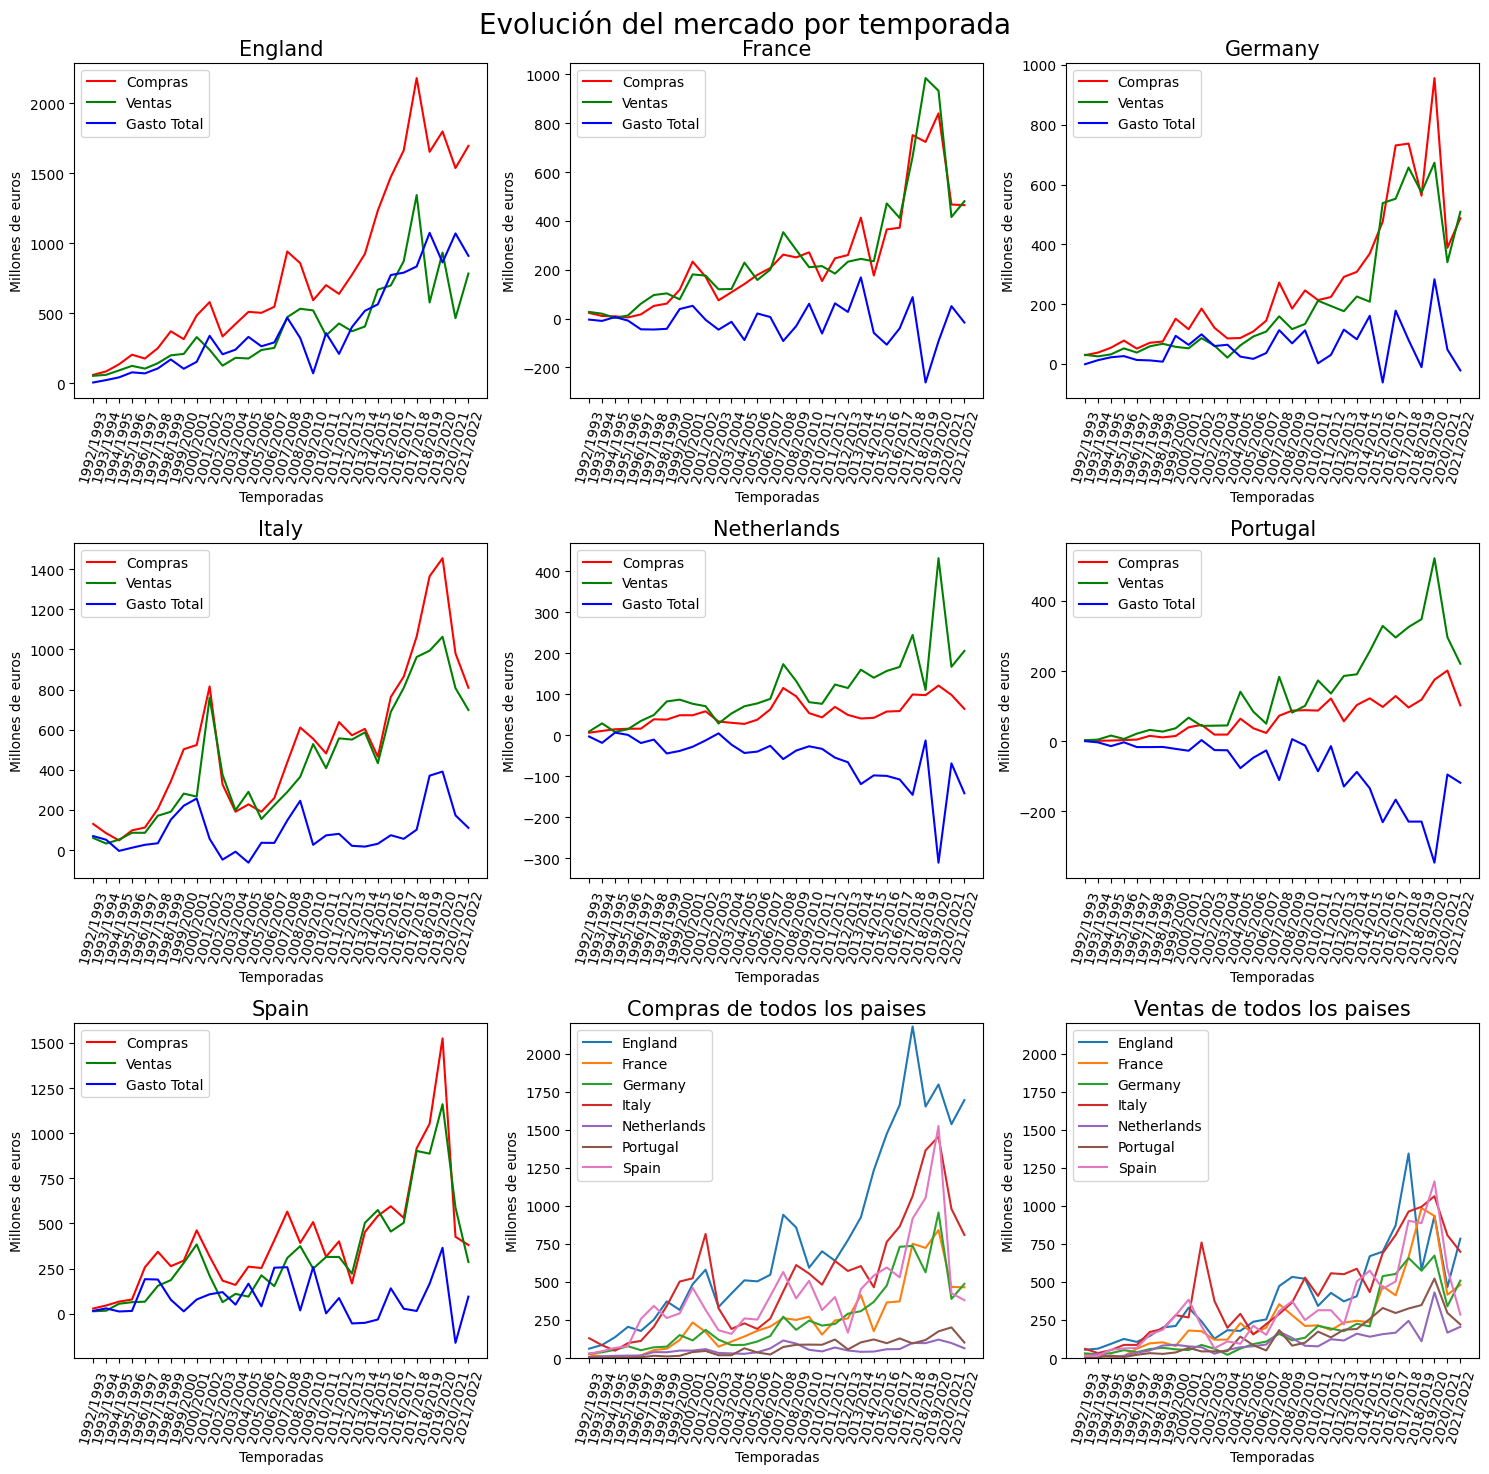

In [3]:
# Creamos una gráfica de 3x3 para todos los paises
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Evolución del mercado por temporada", fontsize=20)

# Como sobran 2 huecos vamos a añadir dos gráficas con
# los datos de ventas y compras de todos los paises
axes[2,1].set_title("Compras de todos los paises", fontsize=15)
axes[2,1].set_xlabel("Temporadas")
axes[2,1].set_ylabel("Millones de euros")
axes[2,1].set_ylim(0, 2200)

axes[2,2].set_title("Ventas de todos los paises", fontsize=15)
axes[2,2].set_xlabel("Temporadas")
axes[2,2].set_ylabel("Millones de euros")
axes[2,2].set_ylim(0, 2200)

# Obtenemos las distintas temporadas
seasons = data_countries.index.get_level_values("season").unique()

# Recorremos los datos para cada uno de los paises
countries = data_countries.index.get_level_values("country").unique()

for index, country in enumerate(countries):
    data_country = data_countries.xs(country, level="country")

    # Configuramos el subplot correspondiente
    ax = axes[index // 3, index % 3]
    ax.set_title(f"{country}", fontsize=15)
    ax.set_xlabel("Temporadas")
    ax.set_ylabel("Millones de euros")
    
    # Añadimos gráficos de líneas para compras, ventas y gasto total
    ax.plot(seasons, data_country["in"], label="Compras", color="red")
    ax.plot(seasons, data_country["out"], label="Ventas", color="green")
    ax.plot(seasons, data_country["total"], label="Gasto Total", color="blue")

    # Personalizamos el gráfico para el país actual
    ax.legend()
    ax.tick_params(axis="x", rotation=75)

    # Añadimos los datos de compra y venta para mostrar en las dos última gráficas
    axes[2,1].plot(seasons, data_country["in"], label=country)
    axes[2,2].plot(seasons, data_country["out"], label=country)

# Personalizamos las dos últimas gráficas
axes[2,1].legend()
axes[2,1].tick_params(axis="x", rotation=75)

axes[2,2].legend()
axes[2,2].tick_params(axis="x", rotation=75)


# Ajustamos el espaciado y mostramos
plt.tight_layout()
plt.show()

Las gráficas anteriores nos ofrecen una visión de las estrategias adoptadas por cada país. Se observa que las ligas menores, como la Holandesa, Portuguesa y Francesa, siguen una estrategia basada principalmente en la venta, particularmente evidente en la Holandesa y Portuguesa. En contraste, en las ligas Española, Alemana e Italiana, se evidencia un equilibrio entre compra y venta, con una tendencia a comprar más que vender. Por último, la liga Inglesa muestra el caso más extremo, con un volumen de compras significativamente mayor que las ventas, diferencia que se ve amplificada con el paso de los años.

A continuación, presentaremos una gráfica que muestra la evolución del gasto por temporada y país, así como otra gráfica que muestra el gasto total, es decir, el acumulado a lo largo de todas las temporadas. Es importante destacar que si los gastos son negativos, significa que las ventas superan a las compras, generando un beneficio en lugar de un gasto.

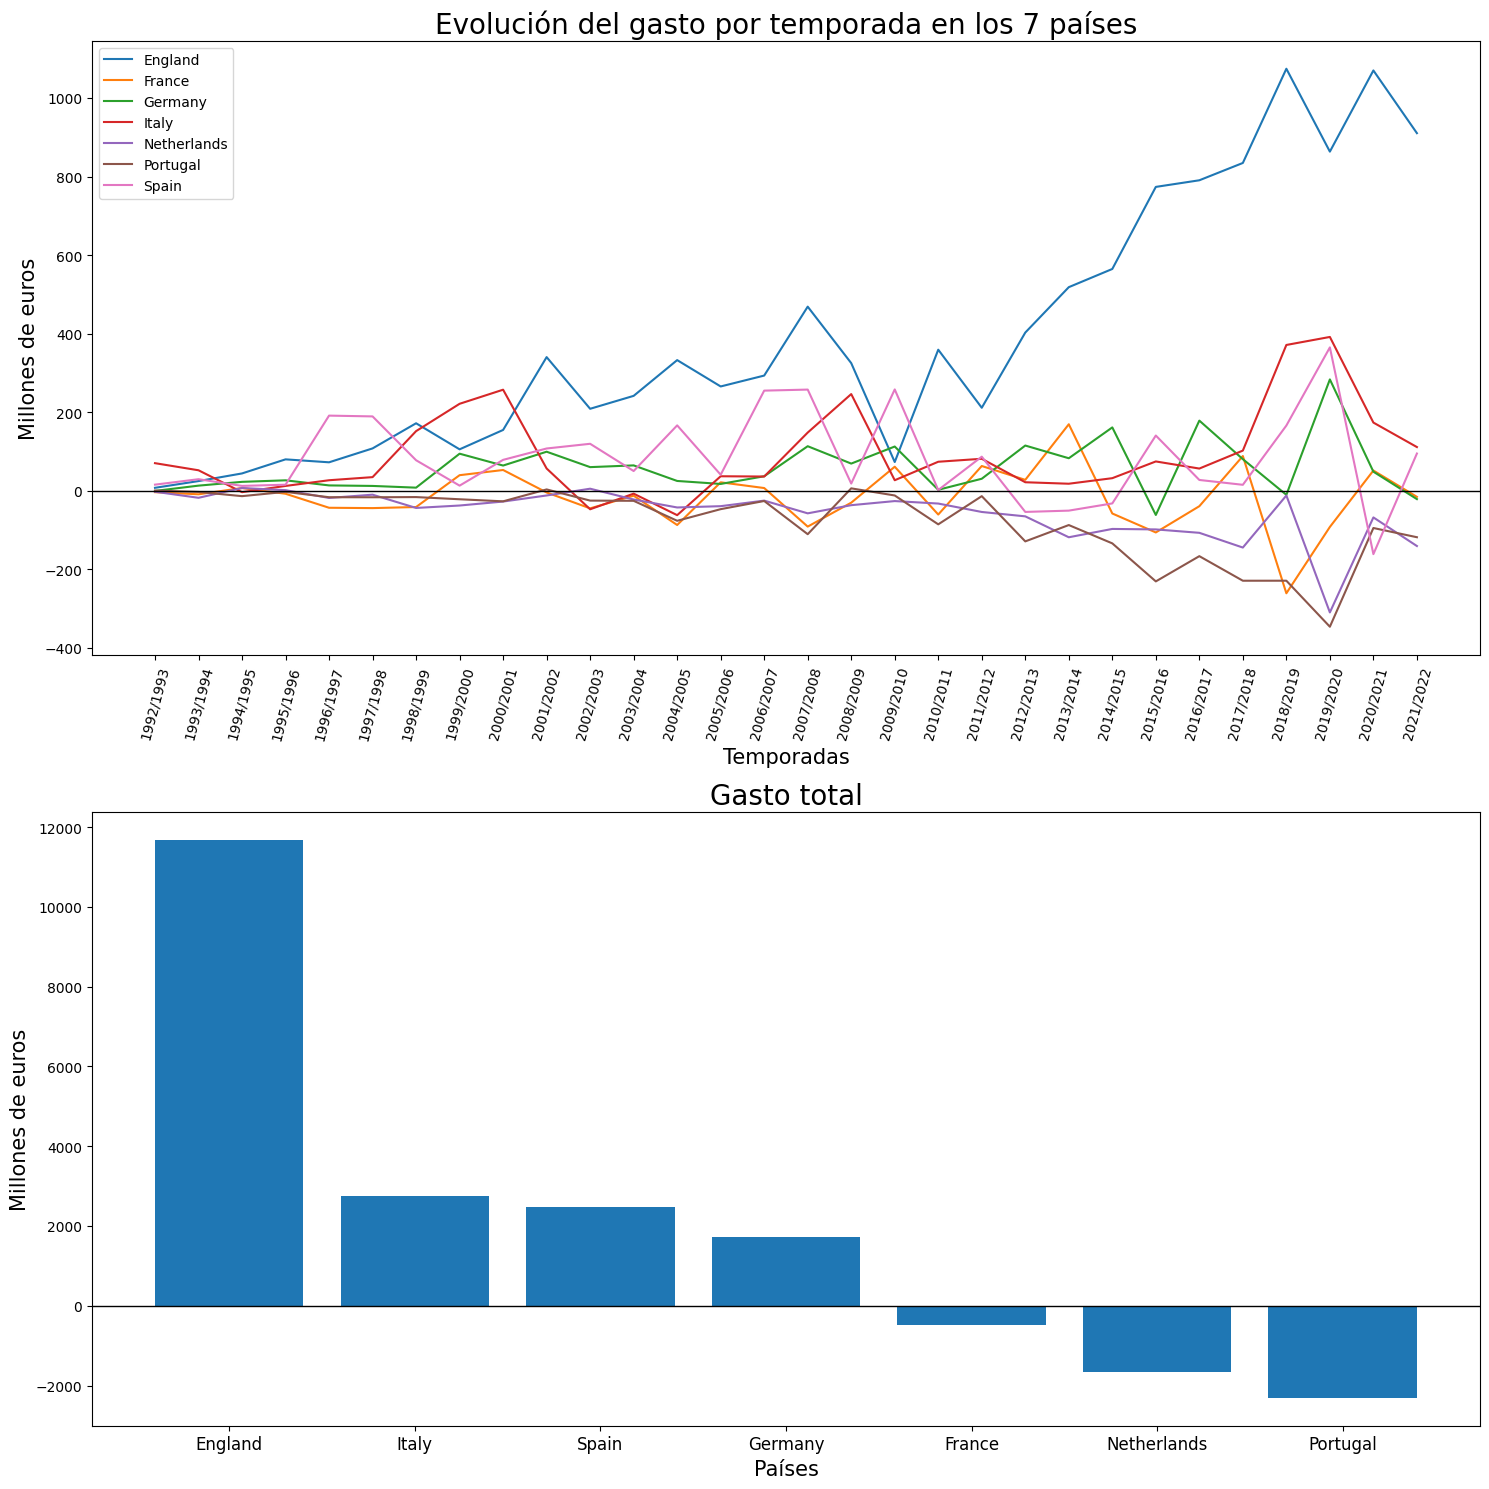

In [4]:
# Creamos una figura con las dos gráficas
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Obtenemos las distintas temporadas
seasons = data_countries.index.get_level_values("season").unique()

# Recorremos los datos para cada uno de los paises
countries = data_countries.index.get_level_values("country").unique()

for country in countries:
    data_country = data_countries.xs(country, level="country")
    
    # Añadimos gráficos de lineas para el total de gasto por temporada
    axes[0].plot(seasons, data_country["total"], label=country)


# Personalizamos el gráfico
axes[0].set_title("Evolución del gasto por temporada en los 7 países", fontsize=20)
axes[0].set_xlabel("Temporadas", fontsize=15)
axes[0].set_ylabel("Millones de euros", fontsize=15)
axes[0].axhline(y=0, color="black", linestyle="-", linewidth=1)
axes[0].tick_params(axis="x", rotation=75)
axes[0].legend()

# Cálculamos el gasto total para cada país y creamos el gráfico de barras
total_cost = data_countries.groupby("country")["total"].sum().sort_values(ascending=False)
axes[1].bar(total_cost.index, total_cost.values)

# Personalizamos el gráfico
axes[1].set_title("Gasto total", fontsize=20)
axes[1].set_xlabel("Países", fontsize=15)
axes[1].set_ylabel("Millones de euros", fontsize=15)
axes[1].axhline(y=0, color="black", linestyle="-", linewidth=1)
axes[1].tick_params(axis="x", labelsize=12)

# Ajustamos el espaciado y mostramos
plt.tight_layout()
plt.show()

El gráfico de la evolución del gasto confirma aún más lo mencionado anteriormente. Se observa que en la liga Holandesa y Portuguesa, prácticamente en todos los años se obtiene un beneficio, similar a lo que ocurre en la liga Francesa, aunque esta última ha tenido más temporadas en las que el gasto superó al beneficio. Este patrón se refleja en el gasto total, donde las tres ligas han acumulado un gasto total negativo, es decir, han obtenido beneficio, siendo el de la liga Francesa el más alejado y bastante cercano a 0.

En contraste, el gasto en las ligas Española, Alemana e Italiana es bastante similar, mostrando un gasto positivo en la mayoría de las temporadas. Se pueden destacar ciertos picos de gasto en la liga Italiana y Española por encima de la Alemana. Esto se refleja en el gasto total, donde la liga Española e Italiana tienen cifras prácticamente idénticas, siendo ligeramente inferior pero cercano el gasto de la liga Alemana.

En el caso de la liga Inglesa, es en este gráfico donde se evidencia la increíble diferencia en su gasto en comparación con sus competidores. El gasto se ha incrementado año tras año desde el inicio y se observa que únicamente se ha visto frenado por dos crisis vividas durante este período: la gran recesión (2008/09) y la pandemia de COVID-19 (2019/20). Aún así, su gasto total se acerca a los 12 mil millones, siendo casi 5 veces superior al gasto de la liga Italiana, que es la segunda liga con más gasto después de la Inglesa.

Ahora procederemos a crear un nuevo dataframe en el que agruparemos los datos por club en lugar de por temporada. Esto nos permitirá analizar con mayor detalle, a nivel individual, las compras y ventas dentro de cada liga.


In [5]:
# Creamos un nuevo dataframe en el que agrupamos los datos de las operaciones por
# paises y clubes en vez de temporadas
data_clubs = data_transfers.groupby(["country", "club_name", "transfer_movement"])["fee_cleaned"].sum().unstack().dropna()
data_clubs["total"]=data_clubs["in"]-data_clubs["out"]

data_clubs

transfer_movement              in      out    total
country club_name                                  
England AFC Bournemouth   274.110   79.165  194.945
        Arsenal FC       1486.145  793.980  692.165
        Aston Villa       917.422  440.568  476.854
        Barnsley FC         6.495    0.190    6.305
        Birmingham City   131.605   28.250  103.355
...                           ...      ...      ...
Spain   UD Almería         33.150   24.500    8.650
        UD Las Palmas      26.201   36.900  -10.699
        UD Salamanca       10.140   12.000   -1.860
        Valencia CF      1031.160  914.685  116.475
        Villarreal CF     661.130  527.490  133.640

[285 rows x 3 columns]

De manera similar a lo realizado anteriormente, generaremos una gráfica de puntos para cada país, donde mostraremos las compras frente a las ventas de los diferentes clubes de cada liga. Además, incorporaremos detalles adicionales que enriquecerán el análisis, como las líneas de las medias de compra y venta, así como la línea de tendencia. Estas gráficas nos proporcionarán una visión detallada de las estrategias individuales seguidas por cada club.

Adicionalmente, dado que disponemos de dos gráficas más para completar la matriz de 3x3, las últimas dos mostrarán la media de compra frente a la media de venta para cada país y la varianza de las compras frente a la varianza de las ventas.

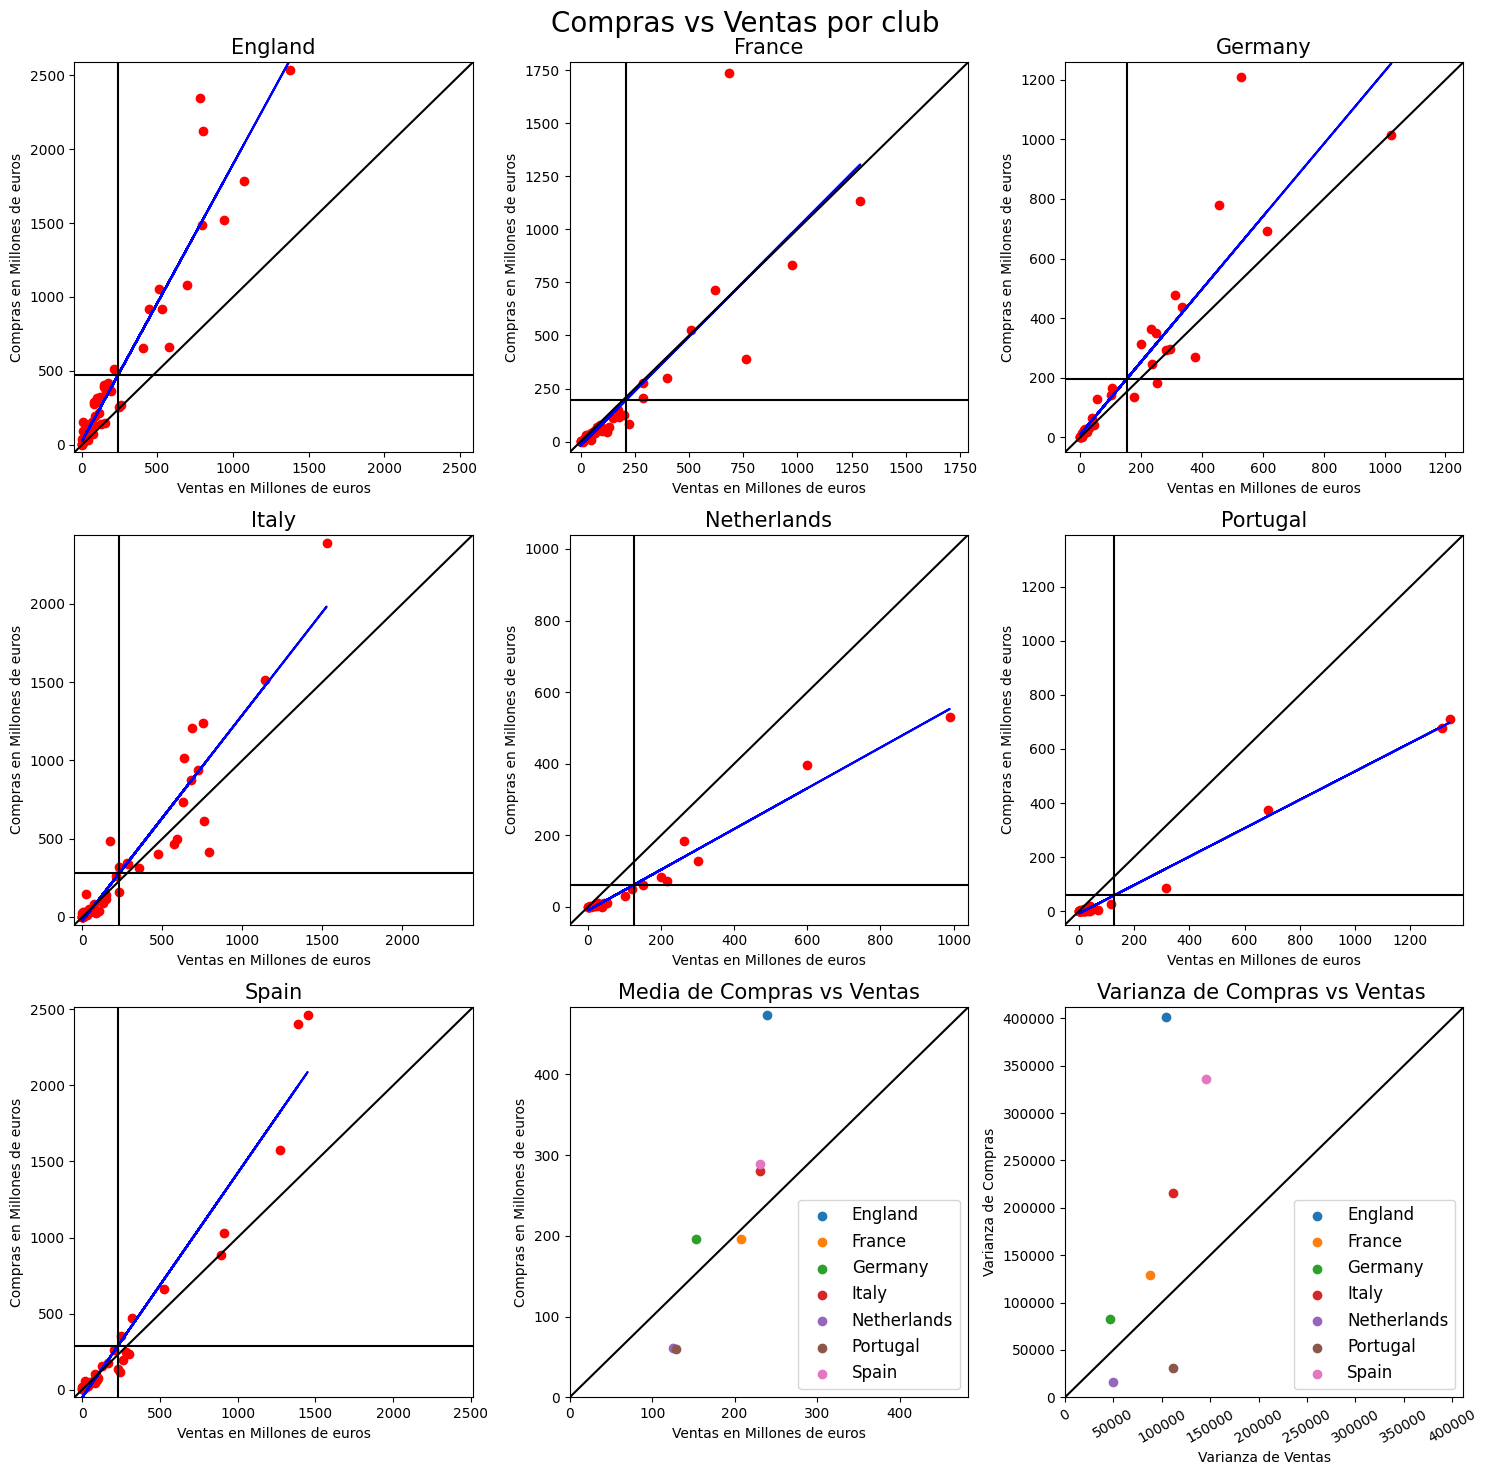

In [6]:
# Creamos una gráfica de 3x3 para todos los paises
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Compras vs Ventas por club", fontsize=20)

# Estas variables nos servirán para personalizar las última gráficas
max_mean=0
max_var=0

# Recorremos los datos para cada uno de los paises
countries = data_clubs.index.get_level_values("country").unique()

for index, country in enumerate(countries):
    data_country = data_clubs.xs(country, level="country")
    
    # Configuramos el subplot correspondiente
    ax = axes[index // 3, index % 3]
    ax.set_title(f"{country}", fontsize=15)
    ax.set_xlabel("Ventas en Millones de euros")
    ax.set_ylabel("Compras en Millones de euros")

    # Añadimos gráficos de dispersión para compras vs ventas por club
    ax.scatter(data_country["out"], data_country["in"], color="red")

    # Calculamos la línea de tendencia (regresión lineal)
    x = data_country["out"].values
    y = data_country["in"].values
    slope, intercept = np.polyfit(x, y, 1)
    ax.plot(x, slope * x + intercept, color="blue")

    # Limitamos la gráfica
    max_out = data_country["out"].max()
    max_in = data_country["in"].max()
    max_in_out=max(max_out, max_in)+50
    ax.set_ylim(-50,max_in_out)
    ax.set_xlim(-50,max_in_out)

    # Calculamos la media de compra y venta
    mean_in = data_country["in"].mean()
    mean_out = data_country["out"].mean()
    
    # Añadimos líneas verticales y horizontales para mostrar la media
    ax.axvline(x=mean_out, color="black", linestyle="-", label="Media Out")
    ax.axhline(y=mean_in, color="black", linestyle="-", label="Media In")

    # Añadimos una línea de pendiente 1 para compararla con la línea de tendencia
    ax.plot([-50, max_in_out], [-50, max_in_out], color="black", linestyle="-", label="Pendiente 1")

    # Añadimos las medias en las gráfica de media de compra vs media de venta
    axes[2,1].scatter(mean_out, mean_in, label=country)

    # Vamos calculando el máximo de media para limitar la gráfica
    max_mean_country=max(mean_out,mean_in)+10
    if(max_mean_country>max_mean):
        max_mean=max_mean_country    
    
    # Calculamos y mostramos la varianza de venta y compra
    var_in_out = data_country[["in", "out"]].var()
    axes[2,2].scatter(var_in_out["out"], var_in_out["in"], label=country)

    # Vamos calculando el máximo de varianza para limitar la gráfica
    max_var_country=max(var_in_out["in"],var_in_out["out"])+10000
    if(max_var_country>max_var):
        max_var=max_var_country


# Configuramos y personalizamos las dos últimas gráficas
axes[2,1].set_title("Media de Compras vs Ventas", fontsize=15)
axes[2,1].set_xlabel("Ventas en Millones de euros")
axes[2,1].set_ylabel("Compras en Millones de euros")

axes[2,2].set_title("Varianza de Compras vs Ventas ", fontsize=15)
axes[2,2].set_xlabel("Varianza de Ventas")
axes[2,2].set_ylabel("Varianza de Compras")
axes[2,2].tick_params(axis="x", rotation=30)


axes[2,1].legend(loc="lower right",fontsize="large")
axes[2,2].legend(loc="lower right",fontsize="large")

axes[2,1].set_ylim(0,max_mean)
axes[2,1].set_xlim(0,max_mean)

axes[2,2].set_ylim(0,max_var)
axes[2,2].set_xlim(0,max_var)

axes[2,1].plot([0, max_mean], [0, max_mean], color="black", linestyle="-")
axes[2,2].plot([0, max_var], [0, max_var], color="black", linestyle="-")

# Ajustamos el espaciado y mostramos
plt.tight_layout()
plt.show()

Las gráficas anteriores nos proporcionan una visión detallada de las tendencias individuales de cada club en cuanto a compras y ventas, además de ofrecer una perspectiva general de la liga. Las tendencias generales confirman lo observado previamente sobre las ligas más enfocadas en comprar o vender. Sin embargo, al analizar los puntos individuales de los clubes, notamos que la mayoría se concentra por debajo de las medias de compra y venta de sus respectivas ligas. Esto se debe a la notable influencia de los clubes grandes, ya que estos manejan la mayor parte del dinero tanto en compras como en ventas. Este fenómeno es evidente en la liga Española, destacando el caso del Real Madrid y el Barcelona, que son los dos puntos más alejados en la gráfica.

Esta dinámica se refleja en la gráfica de varianzas, donde sobresale la dispersión de los datos en las compras. Esto refleja cómo los grandes clubes adquieren jugadores a precios mucho más elevados que los demás, lo que influye en el aumento de la media y puede llegar a distorsionar su representatividad.

Asimismo, resalta que la varianza de las compras es considerablemente mayor que la dispersión en las ventas, excepto en las ligas Holandesa y Portuguesa, donde la estrategia basada en la venta permite que los grandes clubes vendan a precios mucho más altos que los pequeños. En el caso de las demás ligas, esta diferencia entre varianzas indica que si bien los grandes clubes obtienen mayores ingresos por ventas, las mayores diferencias entre los clubes grandes y los clubes pequeños se aprecian mucho más en el valor monetario de sus compras.

Para una visualización más clara de esta dispersión de datos, mostraremos diagramas de cajas para las ventas, compras y el gasto total.

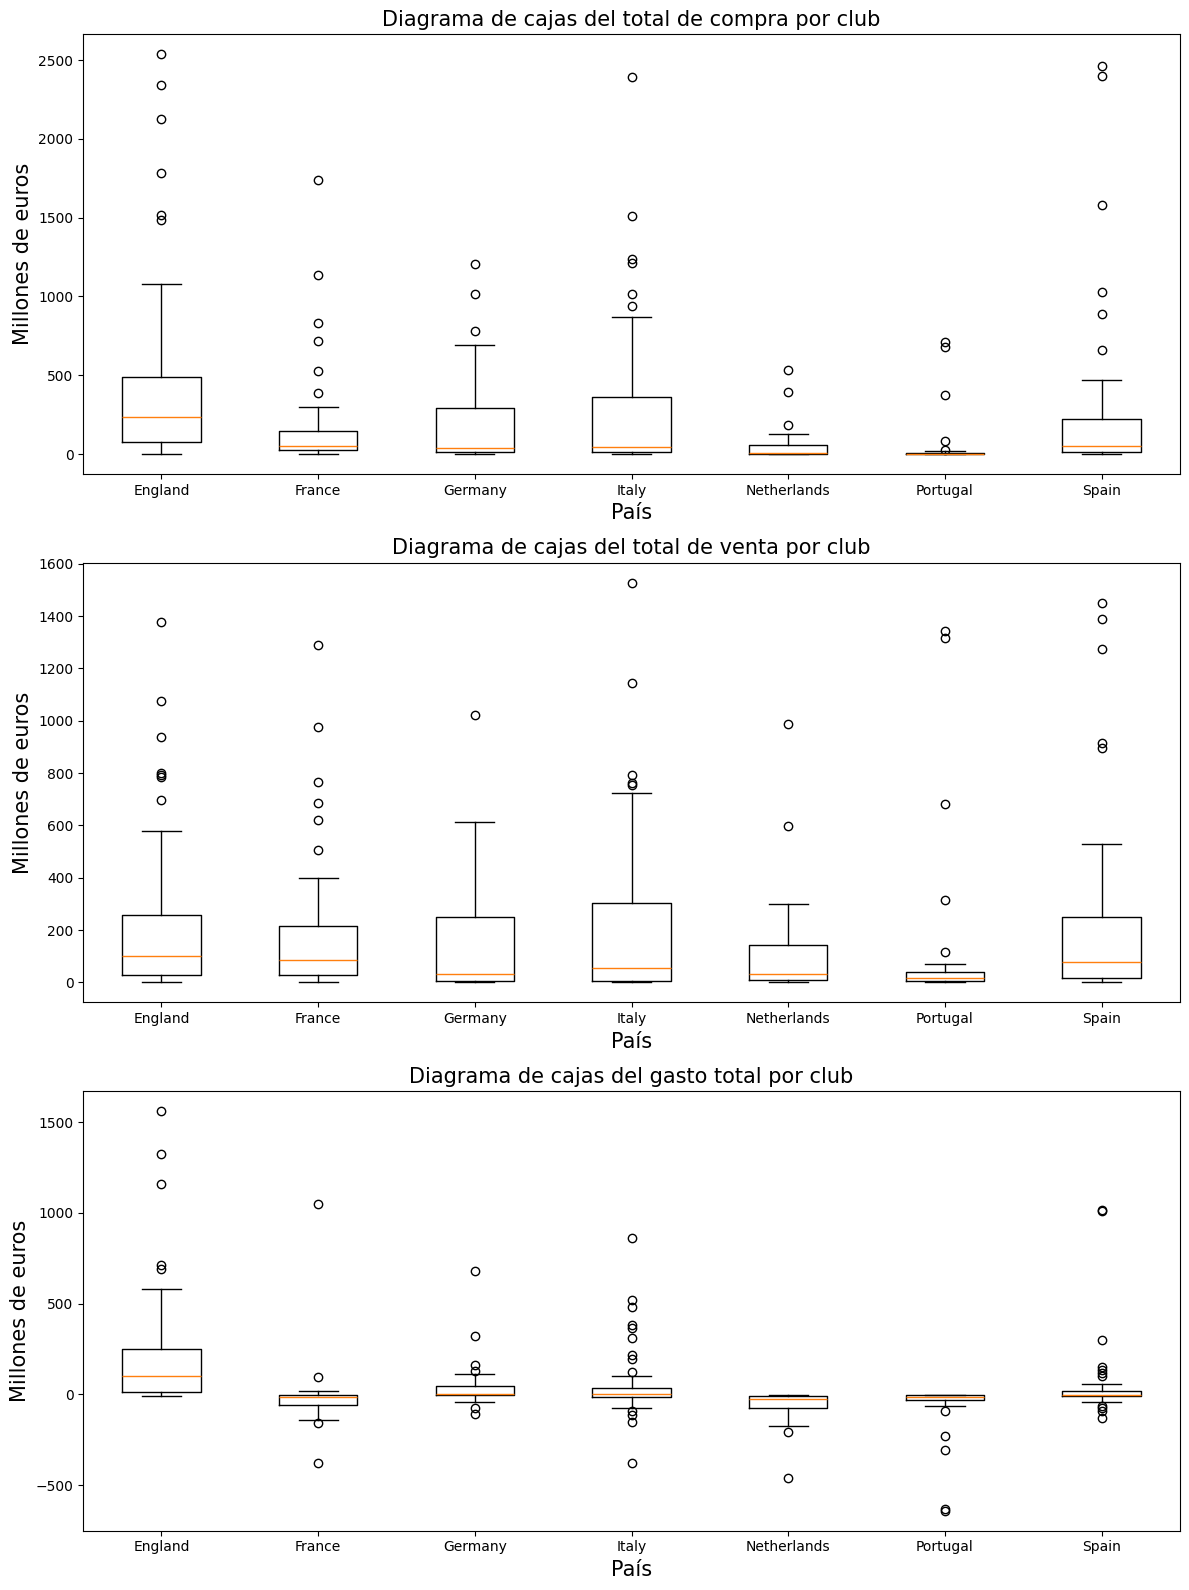

In [7]:
# Creamos una gráfica de 3x1 para todos los países
fig, axes = plt.subplots(3, 1, figsize=(12, 16))

# Creamos los títulos y etiquetas para cada subplot
titles = ["Diagrama de cajas del total de compra por club", 
          "Diagrama de cajas del total de venta por club", 
          "Diagrama de cajas del gasto total por club"]
xlabels = ["País"] * 3
ylabels = ["Millones de euros"] * 3

for i, column in enumerate(["in", "out", "total"]):
    # Agrupamos los datos por país y seleccionamos la columna correspondiente
    grouped_data = data_clubs.groupby("country")[column].apply(list).to_dict()
    countries = list(grouped_data.keys())
    values = list(grouped_data.values())

    # Creamos los boxplots en los subplots correspondientes
    axes[i].boxplot(values, labels=countries)
    axes[i].set_title(titles[i], fontsize=15)
    axes[i].set_xlabel(xlabels[i], fontsize=15)
    axes[i].set_ylabel(ylabels[i], fontsize=15)
    axes[i].tick_params(axis="x", labelsize=10)

# Ajustamos el espaciado y mostramos
plt.tight_layout()
plt.show()

Ahora vamos a explorar el otro conjunto de datos que se enfoca en el rendimiento de los países en la UEFA Champions League. Este dataset abarca información sobre todos los países que han sido representados por alguno de sus clubes en la Champions. Incluye detalles sobre el número de participaciones, títulos ganados, partidos jugados, victorias, derrotas, empates, así como datos sobre los goles marcados y encajados, además del número de puntos obtenidos por sus clubes. Nos centraremos específicamente en el número de títulos, así como en los datos relacionados con partidos jugados, victorias y derrotas, ya que son indicadores suficientes para evaluar el rendimiento de los clubes de cada país.


In [8]:
# Leemos el csv y nos quedamos con las columnas que queremos
data_champions = pd.read_csv("AllTimeRankingByCountry.csv")

# También ordenamos el dataframe por el número de partidos jugados para mostrar al inicio
# los paises más relevantes
columns = ["Country", "Titles", "Played", "Win", "Draw", "Loss"]
data_champions = data_champions[columns].sort_values("Played", ascending=False).reset_index(drop=True)

display(data_champions.head(10))

,Country,Titles,Played,Win,Draw,Loss
0,Spain,19,1349,705,306,338
1,England,14,1239,655,271,313
2,Germany,8,1176,554,242,380
3,Italy,12,1086,508,278,300
4,France,1,794,331,175,288
5,Portugal,4,680,280,156,244
6,Netherlands,6,567,225,145,197
7,Belguim,0,450,151,98,201
8,Greece,0,445,140,111,194
9,Scotland,1,427,184,86,157


Como se observa en la muestra anterior, los siete países con mayor cantidad de partidos jugados son precisamente aquellos de los cuales disponemos de los datasets sobre el mercado de fichajes. Esto sugiere que estas ligas son las más destacadas en Europa. 

A continuación, procederemos a visualizar varias gráficas que representan el rendimiento de todos los países. Posteriormente, nos enfocaremos exclusivamente en estos siete países para un análisis más detallado.


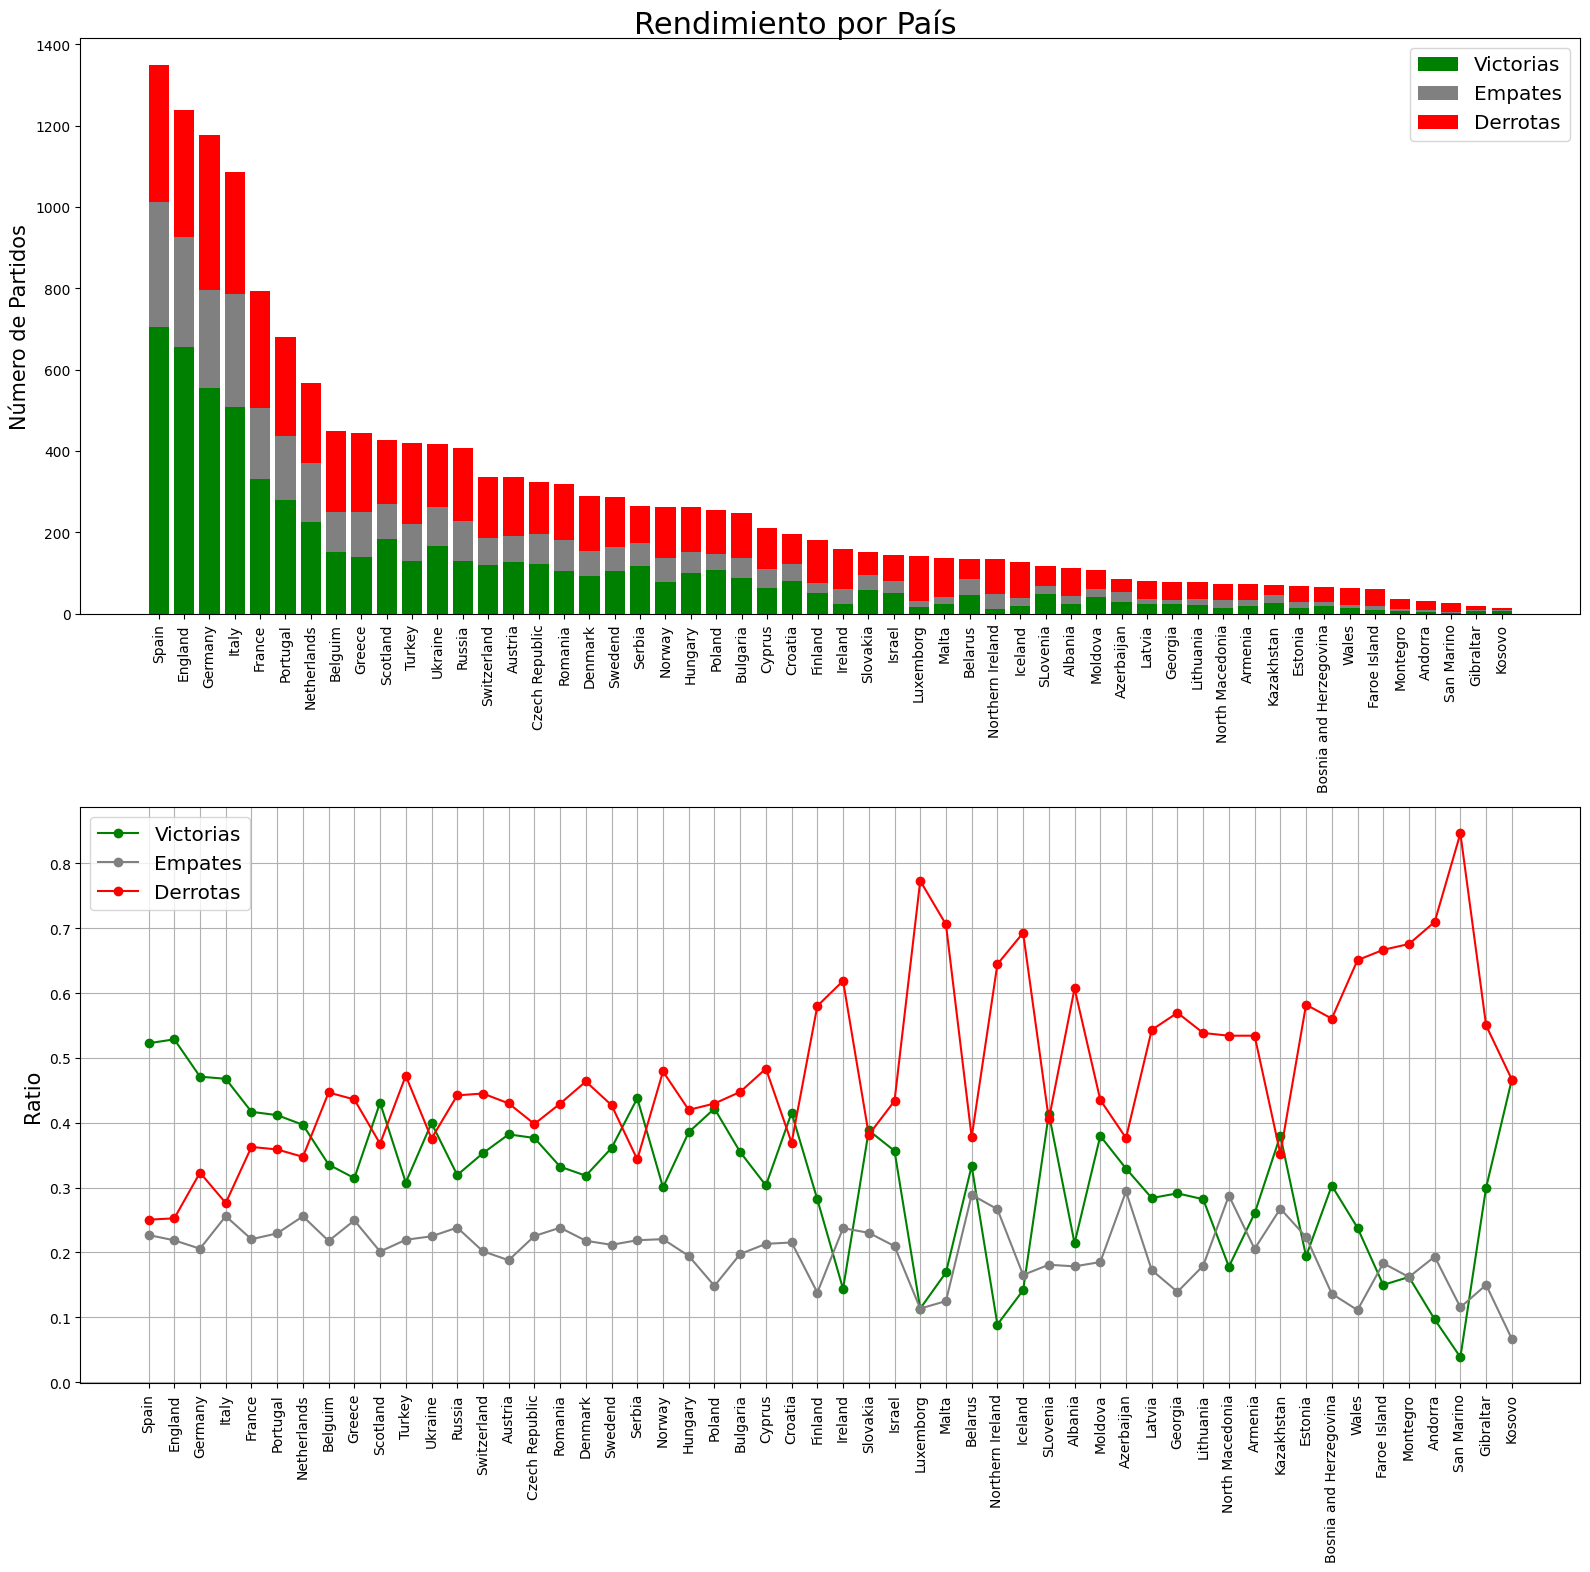

In [9]:
# Creamos subplots con 2 filas y 1 columna
fig, axes = plt.subplots(2, 1, figsize=(16, 16))
fig.suptitle("Rendimiento por País", fontsize=22)

# En la primera gráfica añadimos las barras apiladas de victorias, empates y derrotas
axes[0].bar(data_champions["Country"], data_champions["Win"], label="Victorias", color="green")
axes[0].bar(data_champions["Country"], data_champions["Draw"], bottom=data_champions["Win"], label="Empates", color="gray")
axes[0].bar(data_champions["Country"], data_champions["Loss"], bottom=data_champions["Win"] + data_champions["Draw"], label="Derrotas", color="red")

# Personalizamos la primera gráfica
axes[0].set_ylabel("Número de Partidos", fontsize=15)
axes[0].set_xticks(data_champions["Country"])
axes[0].tick_params(axis="x", rotation=90)
axes[0].legend(fontsize="x-large")

# Calculamos los ratios de victoria, empate y derrota de cada país
win_ratio = data_champions["Win"] / data_champions["Played"]
draw_ratio = data_champions["Draw"] / data_champions["Played"]
loss_ratio = data_champions["Loss"] / data_champions["Played"]

# Añadimos los ratios de cada país a la segunda gráfica
axes[1].plot(data_champions["Country"], win_ratio, marker="o", label="Victorias", color="green")
axes[1].plot(data_champions["Country"], draw_ratio, marker="o", label="Empates", color="gray")
axes[1].plot(data_champions["Country"], loss_ratio, marker="o", label="Derrotas", color="red")

# Personalizamos la segunda gráfica
axes[1].set_ylabel("Ratio", fontsize=15)
axes[1].legend(fontsize="x-large")
axes[1].tick_params(axis="x", rotation=90)
axes[1].grid(True)

# Ajustamos el espaciado y mostramos
plt.tight_layout()
plt.show()

En las gráficas de rendimiento se destaca cómo la mayoría de países tienen un ratio de victorias inferior al ratio de derrotas, a excepción de las 7 grandes ligas y algunos casos adicionales, como Serbia o Croacia. Ahora, para llevar a cabo un análisis más detallado del rendimiento en comparación con el gasto, nos enfocaremos en las 7 grandes ligas. Crearemos un nuevo dataframe que combinará los datos de rendimiento en la Champions League con los datos de los gastos totales.


In [10]:
# Nos quedamos con los 7 paises
data_seven_countries=data_champions.iloc[:7]

# Calculamos los totales de gasto para cada país
sum_by_country = data_countries.groupby(level="country")[["total"]].sum()

# Unimos ambos dataframe por country y cálculamos el ratio de victorias
data_seven=pd.merge(data_seven_countries, sum_by_country, left_on="Country", right_index=True)
data_seven["Win Ratio"] = data_seven["Win"] / data_seven["Played"]
display(data_seven)

,Country,Titles,Played,Win,Draw,Loss,total,Win Ratio
0,Spain,19,1349,705,306,338,2483.593,0.522609
1,England,14,1239,655,271,313,11682.831,0.528652
2,Germany,8,1176,554,242,380,1730.194,0.471088
3,Italy,12,1086,508,278,300,2753.151,0.467772
4,France,1,794,331,175,288,-476.897,0.416877
5,Portugal,4,680,280,156,244,-2308.672,0.411765
6,Netherlands,6,567,225,145,197,-1667.608,0.396825


A continuación, vamos a relacionar el gasto total con los partidos jugados y los títulos obtenidos. Además, vamos a representar unas gráficas que nos permitirán visualizar la correlación entre el rendimiento histórico de las diferentes ligas en la competición europea y sus gastos totales en el mercado de fichajes.


In [11]:
# Realizamos los cálculos de las relaciones
relation_titles_total = data_seven["total"] / data_seven["Titles"]
relation_played_total = data_seven["total"] / data_seven["Played"]

# Creamos un nuevo DataFrame con los cálculos y el país
data_relational = pd.DataFrame({
    "País": data_seven["Country"],
    "Relación Titles/Total": relation_titles_total,
    "Relación Total/Played": relation_played_total
})

data_relational

,País,Relación Titles/Total,Relación Total/Played
0,Spain,130.715421,1.841062
1,England,834.487929,9.429242
2,Germany,216.274250,1.471253
3,Italy,229.429250,2.535130
4,France,-476.897000,-0.600626
5,Portugal,-577.168000,-3.395106
6,Netherlands,-277.934667,-2.941108


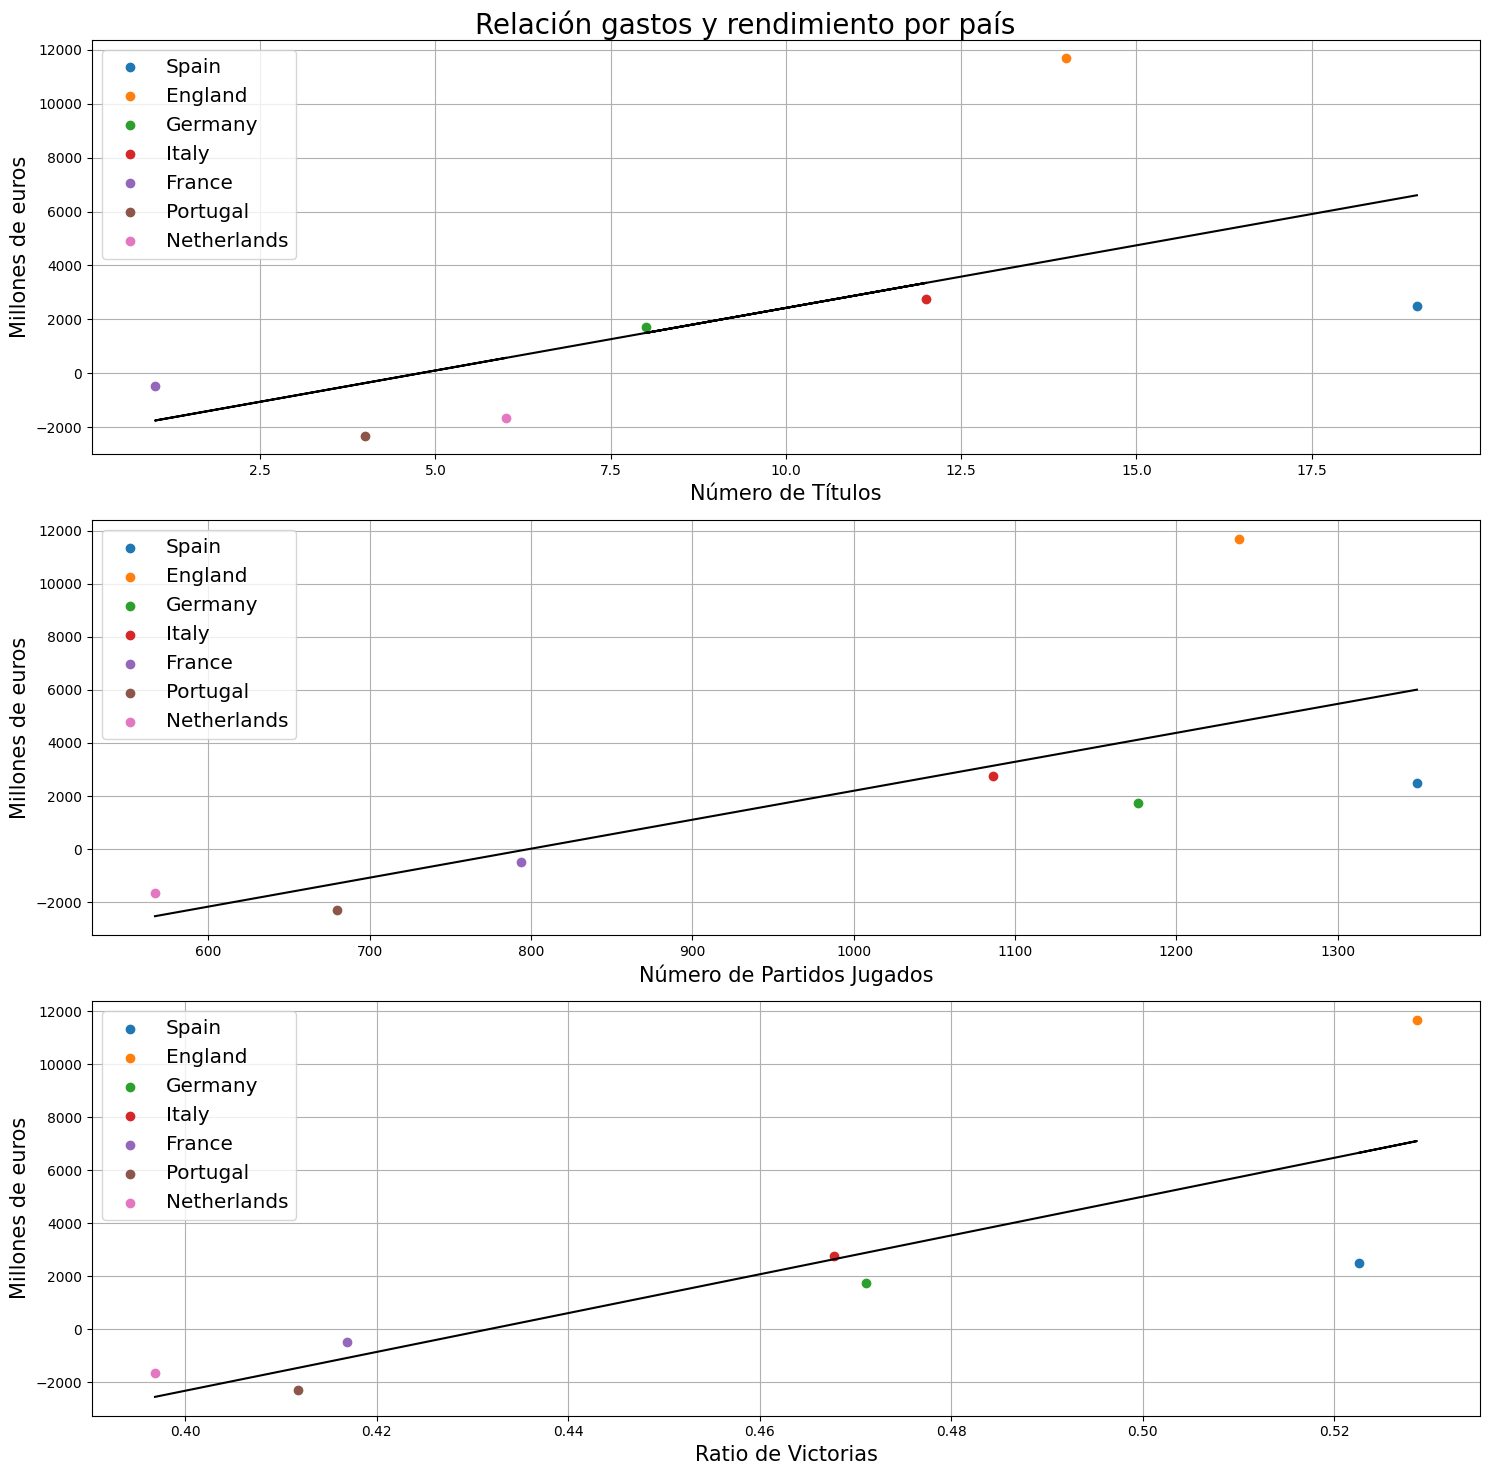

In [12]:
# Creamos 3 subgráficas
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle("Relación gastos y rendimiento por país", fontsize=20)

# Recorremos los países para añadir sus puntos
unique_countries = data_seven["Country"].unique()

for i, country in enumerate(unique_countries):
    country_data = data_seven[data_seven["Country"] == country]
    
    axes[0].scatter(country_data["Titles"], country_data["total"], label=country)
    axes[1].scatter(country_data["Played"], country_data["total"], label=country)
    axes[2].scatter(country_data["Win Ratio"], country_data["total"], label=country)

# Calculamos la línea de tendencia (regresión lineal) para cada gráfica
x = data_seven["Titles"] 
y = data_seven["total"]  
slope, intercept = np.polyfit(x, y, 1)
axes[0].plot(x, slope * x + intercept, color="black")

x = data_seven["Played"]
y = data_seven["total"]
slope, intercept = np.polyfit(x, y, 1)
axes[1].plot(x, slope * x + intercept, color="black")

x = data_seven["Win Ratio"]
y = data_seven["total"]
slope, intercept = np.polyfit(x, y, 1)
axes[2].plot(x, slope * x + intercept, color="black")

# Personalizamos las gráficas
etiquetas = ["Número de Títulos", "Número de Partidos Jugados", "Ratio de Victorias"]
for i, ax in enumerate(axes):
    
    ax.set_ylabel("Millones de euros", fontsize=15)
    ax.set_xlabel(etiquetas[i], fontsize=15)
    ax.legend(fontsize="x-large")
    ax.grid(True)
    ax.legend(fontsize="x-large", loc="upper left")

# Ajustamos el espaciado y mostramos
plt.tight_layout()
plt.show()

En las gráficas anteriores se observa una relación positiva entre el gasto y el rendimiento. Los países que destinan mayores recursos financieros muestran un rendimiento superior en términos de ratio de victorias, número de partidos jugados y títulos ganados. Sin embargo, destaca el caso de la liga Española, que sorprende al tener un rendimiento por encima de la tendencia del gasto. Es decir, a pesar de gastar menos o igual que otras ligas, logra un rendimiento superior. Por otro lado, está el caso contrario con la liga inglesa, que, aunque tiene un buen rendimiento, se puede decir que gasta por encima del rendimiento obtenido.

Para concluir, procederemos al cálculo de la matriz de correlación entre el número de títulos ganados, el número de partidos jugados, el ratio de victorias y el gasto total.

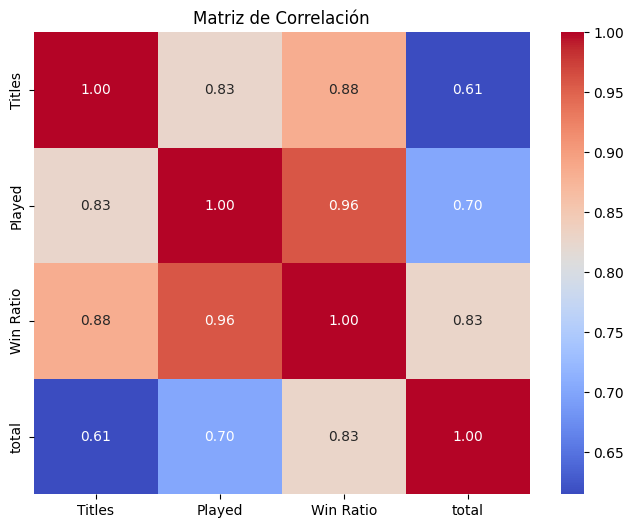

In [13]:
# Calculamos la matriz de correlación
correlation_matrix = data_seven[["Titles", "Played", "Win Ratio", "total"]].corr()

# Mostramos el mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Ajustamos el espaciado y mostramos
plt.title("Matriz de Correlación")
plt.show()

La matriz de correlación revela una fuerte correlación positiva entre el número de títulos, el número de partidos y el ratio de victorias, lo cual es comprensible, ya que un mayor ratio de victorias suele estar asociado con más títulos y una mayor cantidad de partidos jugados. Sin embargo, la correlación que resulta más relevante para nuestro análisis es la que existe entre el gasto y el ratio de victorias, una correlación considerablemente alta, que mostraría que el ratio de victorias es proporcional al gasto en el mercado de fichajes. Aunque no son tan elevadas como la anterior, siguen siendo algo significativas las correlaciones entre el gasto y el número de partidos jugados y, en menor medida, con el número de títulos conseguidos.

Siendo honestos, considero que debido a la presencia de únicamente 7 países en esta muestra, la matriz de correlación puede no ser representativa en su totalidad. Estos países, al ser los más destacados en la competición, tienen estadísticas considerablemente superiores a las demás ligas, lo que puede influir en la fiabilidad de las correlaciones. Por lo tanto, sería interesante como trabajo futuro ampliar este análisis de relación entre rendimiento y gasto a un mayor número de ligas europeas menos destacadas. Esto permitiría extraer conclusiones sobre correlaciones más generales.